# Organize ML projects with Scikit-Learn

While Machine Learning is powerful, people often overestimate it: apply machine learning to your project, and all your problems will be solved. In reality, it's not this simple. To be effective, one needs to organize the work very well. In this notebook, we will walkthrough practical aspects of a ML project. To look at the big picture, let's start with a checklist below. It should work reasonably well for most ML projects, but make sure to adapt it to your needs:

1. **Define the scope of work and objective**
    * How is your solution be used?
    * How should performance be measured? Are there any contraints?
    * How would the problem be solved manually?
    * List the available assumptions, and verify if possible.
    
    
2. **Get the data**
    * Document where you can get that data
    * Store data in a workspace you can easily access
    * Convert the data to a format you can easily manipulate
    * Check the overview (size, type, sample, description, statistics)
    * Data cleaning
    
    
3. **EDA & Data transformation**
    * Study each attribute and its characteristics (missing values, type of distribution, usefulness)
    * Visualize the data
    * Study the correlations between attributes
    * Feature selection, Feature Engineering, Feature scaling
    * Write functions for all data transformations
    
    
4. **Train models**
    * Automate as much as possible
    * Train promising models quickly using standard parameters. Measure and compare their performance
    * Analyze the errors the models make
    * Shortlist the top three of five most promising models, preferring models that make different types of errors.


5. **Fine-tunning**
    * Treat data transformation choices as hyperparameters, expecially when you are not sure about them (e.g., replace missing values with zeros or with the median value)
    * Unless there are very few hyperparameter value to explore, prefer random search over grid search.
    * Try ensemble methods
    * Test your final model on the test set to estimate the generalizaiton error. Don't tweak your model again, you would start overfitting the test set.

## Example: Articles categorization

### Objectives

Build a model to determine the categories of articles. 

### Get Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [3]:
bbc = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/bbc-text.csv')

In [4]:
bbc.sample(5)

,category,text
2124,business,tate & lyle boss bags top award tate & lyle s ...
1597,business,survey confirms property slowdown government f...
1236,business,malaysia lifts islamic bank limit malaysia s c...
354,entertainment,neeson in bid to revive theatre hollywood film...
2157,sport,woodward eyes brennan for lions toulouse s for...


In [5]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


<AxesSubplot:xlabel='category', ylabel='count'>

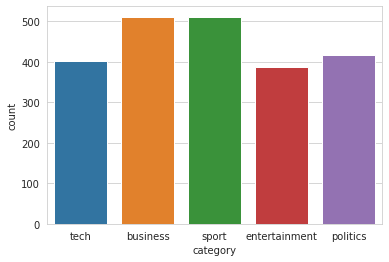

In [6]:
# Your code here
sns.countplot(bbc['category'])

In [7]:
from sklearn.model_selection import train_test_split

X = bbc['text']
y = bbc['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [8]:
X_train

2095    souped-up wi-fi is on the horizon super high-s...
433     benitez issues warning to gerrard liverpool ma...
1635    super union  merger plan touted two of britain...
2140    celts savour grand slam prospect the six natio...
595     branson show flops on us screens entrepreneur ...
                              ...                        
79      khodorkovsky ally denies charges a close assoc...
2093    download chart debut is delayed the inclusion ...
969     steel firm  to cut  45 000 jobs mittal steel  ...
879     singapore growth at 8.1% in 2004 singapore s e...
755     us to rule on yukos refuge call yukos has said...
Name: text, Length: 1780, dtype: object

In [9]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
stop_words = stopwords.words('english')
def preprocessor(text):
    text = (re.sub('[\W]+', ' ', text.lower()))
    return text

porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = stop_words,
                        tokenizer = tokenizer_porter,
                        preprocessor = preprocessor)

clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])
clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(preprocessor=<function preprocessor at 0x7f851ce38620>,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function tokenizer_porter at 0x7f8541b31268>)),
                ('clf', LogisticRegression(random_state=0))])

In [12]:

# Now apply those above metrics to evaluate your model
# Your code here
predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.9820224719101124
confusion matrix:
 [[88  0  1  0  1]
 [ 0 91  0  0  1]
 [ 2  0 82  1  0]
 [ 1  0  0 98  0]
 [ 0  0  1  0 78]]
classification report:
                precision    recall  f1-score   support

     business       0.97      0.98      0.97        90
entertainment       1.00      0.99      0.99        92
     politics       0.98      0.96      0.97        85
        sport       0.99      0.99      0.99        99
         tech       0.97      0.99      0.98        79

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

tfidf = TfidfVectorizer(stop_words = stop_words,
                        tokenizer = tokenizer_porter,
                        preprocessor = preprocessor)

clf = Pipeline([('vect', tfidf),
                ('clf', SVC())])
                
clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(preprocessor=<function preprocessor at 0x7f851ce38620>,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function tokenizer_porter at 0x7f8541b31268>)),
                ('clf', SVC())])

In [14]:
predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.9797752808988764
confusion matrix:
 [[88  1  1  0  0]
 [ 0 92  0  0  0]
 [ 3  0 81  1  0]
 [ 1  0  0 98  0]
 [ 1  0  1  0 77]]
classification report:
                precision    recall  f1-score   support

     business       0.95      0.98      0.96        90
entertainment       0.99      1.00      0.99        92
     politics       0.98      0.95      0.96        85
        sport       0.99      0.99      0.99        99
         tech       1.00      0.97      0.99        79

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = Pipeline([('vect', tfidf),
                ('clf', DecisionTreeClassifier())])
                
clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(preprocessor=<function preprocessor at 0x7f851ce38620>,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function tokenizer_porter at 0x7f8541b31268>)),
                ('clf', DecisionTreeClassifier())])

In [16]:
predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.8471910112359551
confusion matrix:
 [[74  7  3  2  4]
 [ 3 72  7  8  2]
 [ 9  3 69  4  0]
 [ 2  0  3 94  0]
 [ 4  3  4  0 68]]
classification report:
                precision    recall  f1-score   support

     business       0.80      0.82      0.81        90
entertainment       0.85      0.78      0.81        92
     politics       0.80      0.81      0.81        85
        sport       0.87      0.95      0.91        99
         tech       0.92      0.86      0.89        79

     accuracy                           0.85       445
    macro avg       0.85      0.85      0.85       445
 weighted avg       0.85      0.85      0.85       445



In [31]:
from sklearn.ensemble import VotingClassifier

base_classifiers = [('Logistic Regression', LogisticRegression()),
                    ('SVM', SVC(probability = True)),
                    ('DT', DecisionTreeClassifier())]

clf_vot = VotingClassifier(estimators=base_classifiers, 
                            voting='soft',
                            weights=[3, 2, 1]) 
clf_vot = Pipeline([('vect', tfidf),
                ('clf', clf_vot)])
clf_vot.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(preprocessor=<function preprocessor at 0x7f851ce38620>,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function tokenizer_porter at 0x7f8541b31268>)),
                ('clf',
                 VotingClassifier(estimators=[('Logistic Regression',
                                               LogisticRegression()),
          

In [33]:
predictions = clf_vot.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.9842696629213483
confusion matrix:
 [[88  1  1  0  0]
 [ 0 91  1  0  0]
 [ 2  0 83  0  0]
 [ 1  0  0 98  0]
 [ 0  0  1  0 78]]
classification report:
                precision    recall  f1-score   support

     business       0.97      0.98      0.97        90
entertainment       0.99      0.99      0.99        92
     politics       0.97      0.98      0.97        85
        sport       1.00      0.99      0.99        99
         tech       1.00      0.99      0.99        79

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445

